## 1. Bitcoin. Cryptocurrencies. So hot right now.
<p>Since the <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">launch of Bitcoin in 2008</a>, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future<sup>1</sup>. In fact, the 6th of December of 2017 Bitcoin has a <a href="https://en.wikipedia.org/wiki/Market_capitalization">market capitalization</a> above $200 billion. </p>
<p><center>
<img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_82/img/bitcoint_market_cap_2017.png" style="width:500px"> <br> 
<em>The astonishing increase of Bitcoin market capitalization in 2017.</em></center></p>
<p>*<sup>1</sup>- <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. *</p>
<p>That said, let's get to business. As a first task, we will load the current data from the <a href="https://api.coinmarketcap.com">coinmarketcap API</a> and display it in the output.</p>

In [516]:
# Importing pandas
import pandas as pd
import math
import numpy as np

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading in current data from coinmarketcap.com
url = "https://api.coinmarketcap.com/v1/ticker/?limit=10"

data = pd.read_json(url)
df = pd.DataFrame(data)

print(df.head())

#current =  

# Printing out the first few lines
# ... YOUR CODE FOR TASK 1 ...

   24h_volume_usd  available_supply            id  last_updated  \
0      6031380000          16914887       bitcoin    1520864966   
1      1506080000          98142190      ethereum    1520864952   
2       362767000       39091956706        ripple    1520864941   
3       462877000          17013600  bitcoin-cash    1520864952   
4       583216000          55595293      litecoin    1520864941   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    162962250080  2.100000e+07       Bitcoin              -1.81   
1     70496614685           NaN      Ethereum              -1.99   
2     32031832049  1.000000e+11        Ripple              -0.98   
3     18526959720  2.100000e+07  Bitcoin Cash              -2.19   
4     10359849232  8.400000e+07      Litecoin              -1.63   

   percent_change_24h  percent_change_7d  price_btc    price_usd  rank symbol  \
0                3.85             -16.47   1.000000  9634.250000     1    BTC   
1                0.24     

## 2. Full dataset, filtering, and reproducibility
<p>The previous API call returns only the first 100 coins, and we want to explore as many coins as possible. Moreover, we can't produce reproducible analysis with live online data. To solve these problems, we will load a CSV we conveniently saved on the 6th of December of 2017 using the API call <code>https://api.coinmarketcap.com/v1/ticker/?limit=0</code> named <code>datasets/coinmarketcap_06122017.csv</code>. </p>

In [517]:
# Reading datasets/coinmarketcap_06122017.csv into pandas

dec6 = pd.read_csv('datasets/coinmarketcap_06122017.csv')
# Selecting the 'id' and the 'market_cap_usd' columns

market_cap_raw = dec6[['id','market_cap_usd']] 
(market_cap_raw.head())
# Counting the number of values
# ... YOUR CODE FOR TASK 2 ...
market_cap_raw.count()

print(dec6.head())


   Unnamed: 0  24h_volume_usd  available_supply            id  last_updated  \
0           0    9.007640e+09      1.672352e+07       bitcoin    1512549554   
1           1    1.551330e+09      9.616537e+07      ethereum    1512549553   
2           2    1.111350e+09      1.684044e+07  bitcoin-cash    1512549578   
3           3    2.936090e+09      2.779530e+09          iota    1512549571   
4           4    2.315050e+08      3.873915e+10        ripple    1512549541   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    2.130493e+11  2.100000e+07       Bitcoin               0.12   
1    4.352945e+10           NaN      Ethereum              -0.18   
2    2.529585e+10  2.100000e+07  Bitcoin Cash               1.65   
3    1.475225e+10  2.779530e+09          IOTA              -2.38   
4    9.365343e+09  1.000000e+11        Ripple               0.56   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank  \
0                7.33              17.45 

## 3. Discard the cryptocurrencies without a market capitalization
<p>Why do the <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

In [518]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
# ... YOUR CODE FOR TASK 3 ...
cap.head()
print(cap.count())

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10
4        ripple    9.365343e+09
id                1031
market_cap_usd    1031
dtype: int64


## 4. How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

e:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0    56.918669
1    11.629410
2     6.758088
3     3.941238
4     2.502063
5     1.547956
6     1.505323
7     1.314454
8     1.157262
9     0.863312
Name: market_percentage, dtype: float64


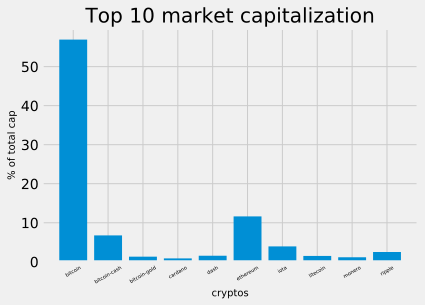

In [519]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'


# Selecting the first 10 rows and setting the index
cap10 = cap.head(10)

total_market_cap = cap.loc[:,'market_cap_usd']
labels = cap10.loc[:,'id']

totalcap = total_market_cap.values.sum()


cap10['market_percentage'] = (cap10.market_cap_usd / totalcap) * 100
market_percentage = cap10.loc[:,'market_percentage']

# Plotting the barplot with the title defined above 
#ax = ...

plt.bar(labels, market_percentage)
plt.xlabel('cryptos', fontsize=10)
plt.title(TOP_CAP_TITLE)
plt.xticks(fontsize=5, rotation=30)

    
# Annotating the y axis with the label defined above
# ... YOUR CODE FOR TASK 4 ...
plt.ylabel(TOP_CAP_YLABEL, fontsize=10)

 
plt.show()


## 5. Making the plot easier to read and more informative
<p>While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative<sup>1</sup>. </p>
<p>For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.</p>
<p><sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represented here.</em></p>
<p><sup>2</sup> <em>The bitcoin forks are actually <strong>very</strong> different, but it is out of scope to talk about them here. Please see the warning above and do your own research.</em></p>

0    11.328480
1    10.638783
2    10.403049
3    10.168858
4     9.971524
5     9.762984
6     9.750855
7     9.691971
8     9.636657
9     9.509393
Name: market_cap_log, dtype: float64


e:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


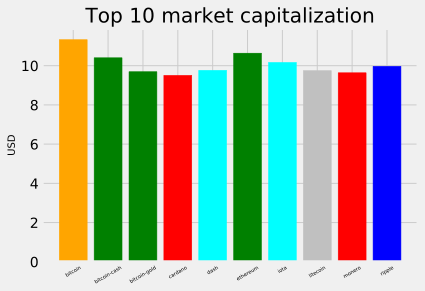

In [520]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'cyan',  'blue', 'silver', 'red']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
#ax = ...

cap10['market_cap_log'] = np.log10(cap10.loc[:,'market_cap_usd'])

cap10.head(10)

market_cap_log = cap10.loc[:,'market_cap_log']

barlist=plt.bar(labels, market_cap_log)
barlist[0].set_color(COLORS[0])
barlist[1].set_color(COLORS[1])
barlist[2].set_color(COLORS[1])
barlist[3].set_color(COLORS[2])
barlist[4].set_color(COLORS[3])
barlist[5].set_color(COLORS[2])
barlist[6].set_color(COLORS[4])
barlist[7].set_color(COLORS[1])
barlist[8].set_color(COLORS[5])
barlist[9].set_color(COLORS[5])
plt.title(TOP_CAP_TITLE)
plt.xticks(fontsize=5, rotation=30)


# Annotating the y axis with 'USD'
# ... YOUR CODE FOR TASK 5 ...
plt.ylabel('USD', fontsize=10)

# Final touch! Removing the xlabel as it is not very informative
# ... YOUR CODE FOR TASK 5 ...

plt.show()


## 6. What is going on?! Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

In [521]:
# Selecting the id, percent_change_24h and percent_change_7d columns
#volatility = ...

market_id_24h_7d = dec6[['id','percent_change_24h','percent_change_7d','market_cap_usd']] 


Volatility_Series = dec6[['id','percent_change_24h','percent_change_7d','market_cap_usd']] 


# Setting the index to 'id' and dropping all NaN rows
#volatility = ...
market_id_24h_7d.set_index('id', inplace=True)


market_id_24h_7d = market_id_24h_7d.query('market_cap_usd > 0')
market_id_24h_7d.head(10)

# Sorting the DataFrame by percent_change_24h in ascending order
#volatility = ...
y_Series = market_id_24h_7d.sort_values('percent_change_7d')

# Checking the first few rows
# ... YOUR CODE FOR TASK 6 ...
print(y_Series.head(10))


                                 percent_change_24h  percent_change_7d  \
id                                                                       
credence-coin                                -94.22             -95.31   
cagecoin                                     -36.26             -92.68   
electra                                      -40.59             -81.29   
jetcoin                                      -36.03             -80.66   
ether-for-the-rest-of-the-world               -3.05             -75.03   
leviarcoin                                   -47.57             -71.70   
falcoin                                        0.99             -71.64   
zeitcoin                                     -24.90             -70.27   
ecocoin                                      -10.16             -66.91   
ulatech                                       29.06             -64.39   

                                 market_cap_usd  
id                                               
credence-co

## 7. Well, we can already see that things are *a bit* crazy
<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

                              id  percent_change_24h  percent_change_7d  \
1246                  flappycoin              -95.85             -96.61   
613                credence-coin              -94.22             -95.31   
1177                   coupecoin              -93.93             -61.24   
1319                    tyrocoin              -79.02             -87.43   
498                  petrodollar              -76.55             542.96   
1270                       bitok              -74.37             -71.67   
765                     bankcoin              -68.56              50.14   
1216                   tellurion              -63.75             -52.59   
689                 shadow-token              -61.40             -59.05   
1183                        eusd              -58.89             -25.50   
933                     kibicoin              -57.51             -15.32   
596                      abjcoin              -54.10             -17.73   
1182                    l

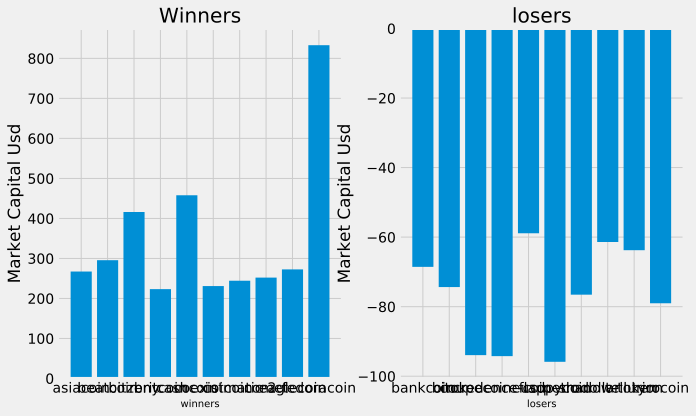

In [522]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title, sortedBy):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    #fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
    

    
    # Plotting with pandas the barchart for the top 10 losers
   # ax = ...
        #volatility_series.

    percent_change_descending = volatility_series.sort_values(sortedBy, ascending=False)
    
    percent_change_losers = volatility_series.loc[:,sortedBy].head(10)
    percent_change_winners = percent_change_descending.loc[:,sortedBy].head(10)


    #label1 = volatility_series.loc[:,'id']

    labels_ascending = volatility_series.loc[:,'id'].head(10)
    labels_descending = percent_change_descending.loc[:,'id'].head(10)

    #labels.head()
    #percent_change_7d_losers.head()
    
    axes[0].bar(labels_descending, percent_change_winners )
    #axes[0].tick_params(labelrotation=90)
    axes[0].set_title("Winners")
    axes[0].set_ylabel("Market Capital Usd")
    axes[0].set_xlabel("winners", size = 10)
 

    axes[1].bar(labels_ascending, percent_change_losers)
    axes[1].set_title("losers")
    #axes[1].tick_params(labelrotation=90)
    axes[1].set_ylabel("Market Capital Usd")
    axes[1].set_xlabel("losers", size = 10)
    




    # Setting the figure's main title to the text passed as parameter
    # ... YOUR CODE FOR TASK 7 ...
    
    # Setting the ylabel to '% change'
    # ... YOUR CODE FOR TASK 7 ...
    
    # Same as above, but for the top 10 winners
   # ax = ...
    
    # Returning this for good practice, might use later
    #return fig, ax
    
    return fig, axes
DTITLE = "24 hours top losers and winners"
sortedBy = "percent_change_24h"
percentChange24h = Volatility_Series.sort_values('percent_change_24h')
top10_subplot(percentChange24h,DTITLE,sortedBy)
# Calling the function above with the 24 hours period series and title DTITLE  
#fig, ax = ...


## 8. Ok, those are... interesting. Let's check the weekly Series too.
<p>800% daily increase?! Why are we doing this tutorial and not buying random coins?<sup>1</sup></p>
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily.</p>
<p><em><sup>1</sup> Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time</em></p>

                                   id  percent_change_24h  percent_change_7d  \
1101                        royalties               -9.06             -99.59   
1246                       flappycoin              -95.85             -96.61   
613                     credence-coin              -94.22             -95.31   
903                          cagecoin              -36.26             -92.68   
1319                         tyrocoin              -79.02             -87.43   
922                           electra              -40.59             -81.29   
889                           jetcoin              -36.03             -80.66   
1078                           everus              -21.99             -76.86   
904   ether-for-the-rest-of-the-world               -3.05             -75.03   
1182                         landcoin              -52.11             -73.62   
682                        leviarcoin              -47.57             -71.70   
1270                            bitok   

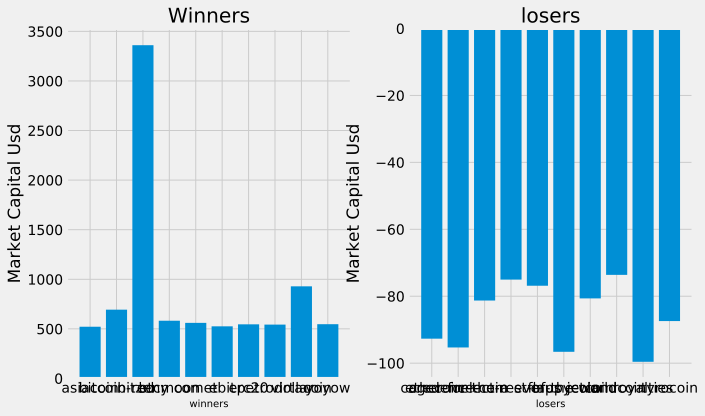

In [523]:
# Sorting in ascending order
volatility7d = ...

WTITLE = "Weekly top losers and winners"
sortedBy = "percent_change_7d" 

# Calling the top10_subplot function
#fig, ax = ...
percentChange7d = Volatility_Series.sort_values('percent_change_7d')
top10_subplot(percentChange7d,WTITLE,sortedBy)
print(percentChange7d)



## 9. How small is small?
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

In [524]:
# Selecting everything bigger than 10 billion 
largecaps = market_id_24h_7d.query('market_cap_usd > 10000000000')

# Printing out largecaps
# ... YOUR CODE FOR TASK 9 ...

print(largecaps.head(25))


              percent_change_24h  percent_change_7d  market_cap_usd
id                                                                 
bitcoin                     7.33              17.45    2.130493e+11
ethereum                   -3.93              -7.33    4.352945e+10
bitcoin-cash               -5.51              -4.75    2.529585e+10
iota                       83.35             255.82    1.475225e+10


## 10. Most coins are tiny
<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>
<p><em>This is all for now. Thanks for completing this project!</em></p>

[10, 17, 1004]


<Container object of 3 artists>

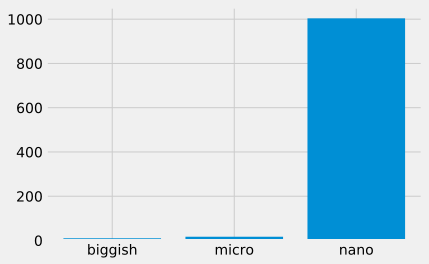

In [525]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd > 3000000000')

# Same as above for micro ...
micro = capcount('market_cap_usd < 3000000000& market_cap_usd > 500000000')

# ... and for nano
nano =  capcount('market_cap_usd < 500000000')

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 

print(values)
plt.bar(LABELS, values)

# ... YOUR CODE FOR TASK 10 ...

